# Our Objective 
We will try to build model for classifying MNIST dataset(28x28 images), which consists of 70,000 handwritten images from 0–9.

In [23]:

# Importing necessary libraries
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
     


# Loading the dataset
The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing.

When we load the dataset below, X_train and X_test will contain the images, and y_train and y_test will contain the digits that those images represent.

In [24]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Exploratory data analysis
Now let’s take a look at one of the images in our dataset to see what we are working with. We will plot the first image in our dataset and check its size using the ‘shape’ function.

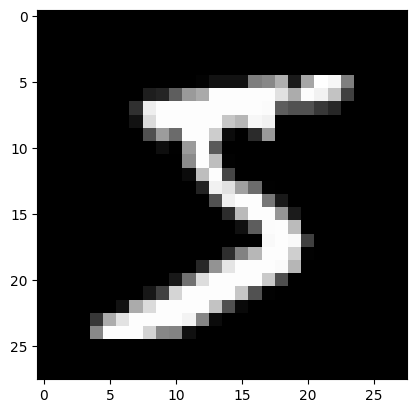

In [25]:
#plot the first image in the dataset
plt.imshow(X_train[0], cmap='gray')

In [26]:
#check image shape
X_train[0].shape

(28, 28)

By default, the shape of every image in the mnist dataset is 28 x 28, so we will not need to check the shape of all the images. When using real-world datasets, you may not be so lucky. 28 x 28 is also a fairly small size, so the CNN will be able to run over each image pretty quickly.

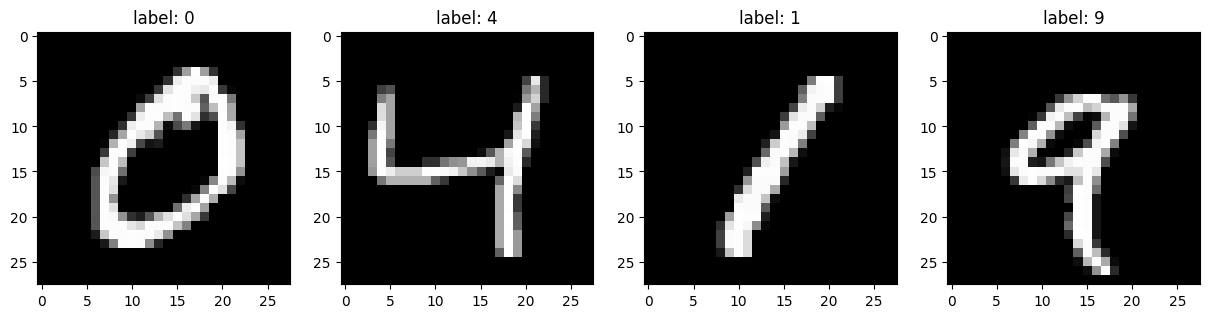

In [27]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 1

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text('label: {}'.format(y_train[i]))
    plt.imshow(X_train[i], cmap='gray')
plt.show()

# Data preprocessing
Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [28]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

In [29]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Building the model

The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.

We use the ‘add()’ function to add layers to our model.

Our first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.

64 in the first layer and 32 in the second layer are the number of nodes in each layer. This number can be adjusted to be higher or lower, depending on the size of the dataset. In our case, 64 and 32 work well, so we will stick with this for now.

Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix. Refer back to the introduction and the first image for a refresher on this.

Activation is the activation function for the layer. The activation function we will be using for our first 2 layers is the ReLU, or Rectified Linear Activation. This activation function has been proven to work well in neural networks.

Our first layer also takes in an input shape. This is the shape of each input image, 28,28,1 as seen earlier on, with the 1 signifying that the images are greyscale.

In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.

‘Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.

We will have 10 nodes in our output layer, one for each possible outcome (0–9).

The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

In [30]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(2, kernel_size=5, activation='relu', input_shape=(28,28,1),strides=1))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(4, kernel_size=3, activation='relu',strides=1))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

C:\Users\Clone\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the model
Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics.

The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

We will use ‘categorical_crossentropy’ for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.

To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.

In [32]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following parameters: training data (train_X), target data (train_y), validation data, and the number of epochs.

For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test.

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. For our model, we will set the number of epochs to 3.

In [34]:
#train model
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8800 - loss: 0.3906 - val_accuracy: 0.9352 - val_loss: 0.2050
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9384 - loss: 0.1972 - val_accuracy: 0.9534 - val_loss: 0.1551


We simply call the fit function from our model, and Keras will automatically run the computation for training our data. As you can see in the code above, fit method need the following parameters: x_data, y_data, number of epoch. The validation data is an optional parameters. We used the validation data to check is our model good enough or maybe overfit in there.

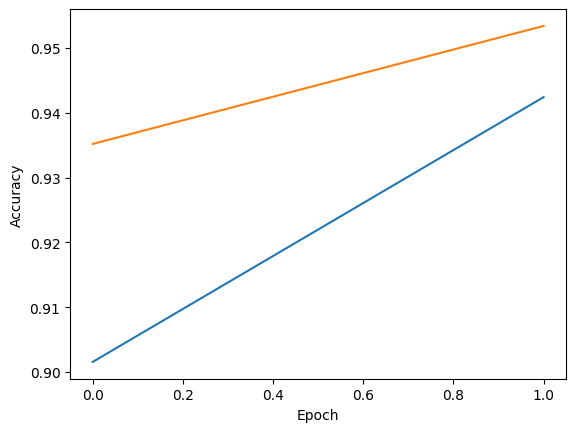

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Using The Model to Make Predictions

If you want to see the actual predictions that our model has made for the test data, we can use the predict function. The predict function will give an array with 10 numbers. These numbers are the probabilities that the input image represents each digit (0–9). The array index with the highest number represents the model prediction. The sum of each array equals 1 (since each number is a probability).

To show this, we will show the predictions for the first 4 images in the test set.

Note: If we have new data, we can input our new data into the predict function to see the predictions our model makes on the new data. Since we don’t have any new unseen data, we will show predictions using the test set for now.

In [36]:
#show predictions for the first 3 images in the test set
prediction = model.predict(X_test[:4])
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


array([[2.1326544e-08, 9.6373631e-11, 4.3514120e-08, 3.7419543e-08,
        5.1127180e-10, 7.7057116e-10, 1.2101007e-12, 9.9999762e-01,
        1.0042832e-07, 2.2769289e-06],
       [5.5928431e-05, 4.5554916e-05, 9.9288094e-01, 3.5837831e-03,
        9.6239219e-08, 5.1781477e-08, 1.8282914e-05, 9.7468842e-07,
        3.4144050e-03, 5.9764520e-11],
       [2.1262984e-07, 9.9952161e-01, 6.9167872e-06, 1.0867627e-06,
        1.9854782e-04, 2.5719667e-06, 1.6258346e-04, 5.5578485e-06,
        1.0066683e-04, 1.0893003e-07],
       [9.9941933e-01, 1.7536061e-09, 2.0642431e-06, 2.7690001e-09,
        3.4922454e-07, 2.2625700e-06, 5.6774891e-04, 5.5074782e-08,
        6.7833712e-06, 1.3381680e-06]], dtype=float32)

Let’s compare this with the actual results.

In [37]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

We can get the actual digit using argmax function from numpy. below code is plotting the test image with the label:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
[[2.13265032e-08 9.63732635e-11 4.35140350e-08 3.74194009e-08
  5.11269860e-10 7.70568220e-10 1.21010070e-12 9.99997616e-01
  1.00428323e-07 2.27692681e-06]
 [5.59284817e-05 4.55549598e-05 9.92880940e-01 3.58378491e-03
  9.62392193e-08 5.17813810e-08 1.82829299e-05 9.74686600e-07
  3.41440504e-03 5.97646377e-11]
 [2.12629431e-07 9.99521613e-01 6.91677405e-06 1.08676068e-06
  1.98547626e-04 2.57196166e-06 1.62583150e-04 5.55783754e-06
  1.00666643e-04 1.08929825e-07]]


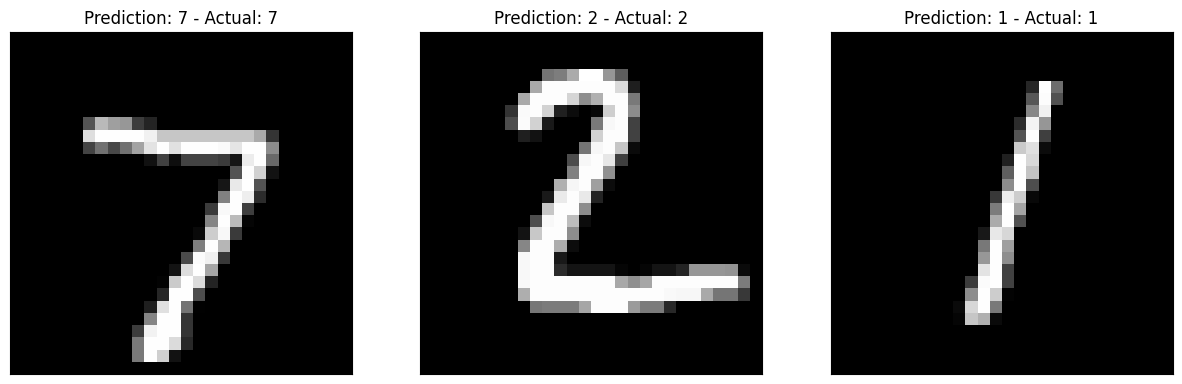

In [38]:
prediction = model.predict(X_test[:3])
print(prediction)
import numpy as np

w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)

    plt.xticks([], [])
    plt.yticks([], [])
    actual_label = np.argmax(y_test[i-1])
    prediction_label = np.argmax(prediction[i-1])
    ax.title.set_text('Prediction: {} - Actual: {}'.format(prediction_label, actual_label))
    image = X_test[i-1].reshape((28,28))
    plt.imshow(image, cmap='gray')
plt.show()